In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.DataFrame({'Weight':[45,65,53,49,45],'Height':[140,165,146,150,142],'Age':[15,17,16,17,18]})

In [4]:
data

,Weight,Height,Age
0,45,140,15
1,65,165,17
2,53,146,16
3,49,150,17
4,45,142,18


In [6]:
# Estimation - find b0, b1
# OLS and Gradient 
# b1 =  sum((x-xbar)*(y-ybar))/ sum((x-xbar)^2)
#b0 = ybar - b1*xbar

In [17]:
num= np.sum((data['Weight'] - data['Weight'].mean()) * (data['Height'] - data['Height'].mean()))

In [18]:
den=np.sum((data['Weight']-data['Weight'].mean())**2)

In [20]:
b1=num/den
b1

1.1366279069767442

In [22]:
b0 = data['Height'].mean()-b1*data['Weight'].mean() # ybar-b1*xbar
b0

90.17732558139534

In [23]:
# Height(cms) = 1.13 *Weight(kg) + 90.17

In [24]:
ypred=b1*data['Weight']+b0

In [25]:
ypred

0    141.325581
1    164.058140
2    150.418605
3    145.872093
4    141.325581
Name: Weight, dtype: float64

In [26]:
data['Height']

0    140
1    165
2    146
3    150
4    142
Name: Height, dtype: int64

In [28]:
resid=data['Height']-ypred
resid

0   -1.325581
1    0.941860
2   -4.418605
3    4.127907
4    0.674419
dtype: float64

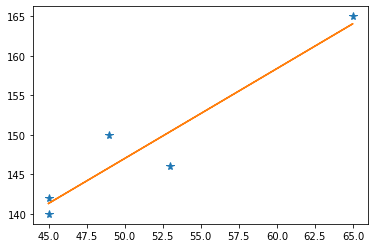

In [31]:
from matplotlib import pyplot as plt
plt.plot(data['Weight'],data['Height'],'*', markersize=8)
plt.plot(data['Weight'],b1*data['Weight']+b0)

In [32]:
resid

0   -1.325581
1    0.941860
2   -4.418605
3    4.127907
4    0.674419
dtype: float64

In [34]:
#se=resid**2
sse=np.sum(se)
mse=np.mean(se)
rmse=np.sqrt(mse)


In [36]:
#print(se)
print(sse)
print(mse)
print(rmse)

39.662790697674566
7.932558139534914
2.8164797424329033


In [ ]:
# ypred=b1*weight +b2*age + b0

In [37]:
# Var(mean) - var(line) / var(mean)

In [38]:
mean_model= np.var(data['Height']-data['Height'].mean())

In [41]:
reg_model=np.var(data['Height'] - (b1*data['Weight']+b0))

In [42]:
r2=(mean_model-reg_model)/mean_model
r2

0.8996386875058843

In [43]:
data.corr()

,Weight,Height,Age
Weight,1.000000,0.948493,0.126886
Height,0.948493,1.000000,0.291182
Age,0.126886,0.291182,1.000000


In [44]:
R=0.948493
R**2

0.899638971049

In [46]:
from sklearn.linear_model import LinearRegression

In [48]:
mod=LinearRegression()
mod.fit(data['Weight'].values.reshape(-1,1),data['Height'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
ypred1=mod.predict(data['Weight'].values.reshape(-1,1))
ypred1

array([141.3255814 , 164.05813953, 150.41860465, 145.87209302,
       141.3255814 ])

In [50]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(data['Height'],ypred1)

0.899638687505884

In [51]:
np.sqrt(mean_squared_error(data['Height'],ypred1))

2.816479742432905

In [52]:
mod.coef_

array([1.13662791])

In [53]:
mod.intercept_

90.17732558139537

In [55]:
data_ref=pd.read_excel('Refrigerators.xlsx')

In [57]:
data_ref.head()

,Price,Opcost,CoolSize,FreezeSize,Shelves,Features
0,595,75,7.1,5.7,3,2
1,685,75,7.2,5.7,3,1
2,535,67,8.8,4.5,1,6
3,600,67,8.7,4.5,3,5
4,605,67,8.8,4.5,3,3


In [ ]:
# Model -  Predicting price of refrigerator using all other inputs

In [56]:
import statsmodels.api as sm

In [59]:
inp=data_ref.iloc[:,1:]
out=data_ref['Price']

In [63]:
inp_c=sm.add_constant(inp)
ols1=sm.OLS(out,inp_c)
mod1=ols1.fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     32.05
Date:                Wed, 20 May 2020   Prob (F-statistic):           2.27e-11
Time:                        15:38:28   Log-Likelihood:                -201.12
No. Observations:                  37   AIC:                             414.2
Df Residuals:                      31   BIC:                             423.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -797.8082    271.409     -2.940      0.006   -1351.351    -244.265
Opcost        -6.9578      2.275     -3.058      0.005     -11.598      -2.317
CoolSize      76.4971     19.442      3.935      0.000      36.846     116.148
FreezeSize   213.8785     35.761      5.981      0.000     140.943     286.814
Shelves       37.9373      9.886      3.837      0.001      17.774      58.100
Features      23.7636      4.512      5.267      0.000      14.562      32.965
==============================================================================
Omnibus:                        0.974   Durbin-Watson:                   2.321
Prob(Omnibus):                  0.614   Jarque-Bera (JB):                1.005
Skew:                           0.289   Prob(JB):                        0.605
Kurtosis:                       2.435   Cond. No.                     1.97e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
 Estimated value of beta- true value of beta  / standard error